This demonstrates all the steps in my candidate selection before conducting visual inspection

In [1]:
import numpy as np
import splat
import wisps.data_analysis as wispd
from wisps.data_analysis import selection_criteria as sel_crt
import shapey
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
import wisps

import matplotlib as mpl

from tqdm import tqdm
import random
import matplotlib.pyplot as plt
%matplotlib inline

Adding 2404 sources from /Users/caganze/research/splat//resources/Spectra/Public/SPEX-PRISM/ to spectral database
Adding 89 sources from /Users/caganze/research/splat//resources/Spectra/Public/MAGE/ to spectral database
Adding 145 sources from /Users/caganze/research/splat//resources/Spectra/Public/LRIS-RED/ to spectral database


In [2]:
#some functions 
def get_indices(x):
    if x is None :
        return pd.Series({})
    else:
        return  pd.concat([pd.Series(x.indices), pd.Series(x.mags), pd.Series(x.snr)])
    
def get_spt(x):
    if x is None:
        return np.nan
    else:
        return x.spectral_type[0]
#change f-test definition
def f_test_fx(x, df1, df2):
    return stats.f.pdf(x, df1, df2)

def box_parameters(idx, spt_range):
    bs=idx.shapes
    b=[x for x in bs if x.shape_name==spt_range][0]
    print ('{}  {} m: {} b: {} s:{}, comp : {}, cont: {}'.format(spt_range, idx,  round(b.coeffs[0], 2), round(b.coeffs[1], 2), round(b.scatter, 2), round(idx.completeness[spt_range], 2),  round(idx.contamination[spt_range], 3)))

In [3]:
cands=pd.read_pickle('~/research/wisps/libraries/real_ucds.pkl')

In [4]:
3

3

In [5]:
#get data.big_file()
alldata=wisps.get_big_file()
spex=wisps.Annotator.reformat_table(wisps.datasets['spex'])

#cands=pd.read_hdf(wisps.OUTPUT_FILES+'/true_spectra_cands.hdf')
#cands0=pd.read_hdf(wisps.LIBRARIES+'/objects_of_interest.h5', key='all')
#cands0=(cands0[~cands0.spectra.isna()]).reset_index(drop=True)
#cands=cands0.spectra.apply(get_indices)
#cands['dof']=cands0.spectra.apply(lambda x: x.dof).values
#cands['grism_id']=cands0.grism_id
#cands['spt']=cands0.spectra.apply(get_spt)
cands['line_chi']=cands.spectra.apply(lambda x : x.line_chi)
cands['spex_chi']=cands.spectra.apply(lambda x: x.spex_chi)
cands['f_test']=cands.spectra.apply(lambda x: x.f_test)

#cands_dff['f_test']=(cands_dff['spex_chi']/cands_dff['line_chi']).apply(f_test_fx)

#cands=wisps.Annotator.reformat_table(cands)
#cands=cands[(cands.spt >=17.) ]
#cands=cands.reset_index(drop=True)



spex_df=wisps.Annotator.reformat_table(wisps.datasets['spex']).reset_index(drop=True)
manj=wisps.Annotator.reformat_table(wisps.datasets['manjavacas']).reset_index(drop=True)
schn=wisps.Annotator.reformat_table(wisps.datasets['schneider']).reset_index(drop=True)
ydwarfs=(manj[manj['spt'].apply(wisps.make_spt_number)>38].append(schn)).reset_index(drop=True)
spex_df['spt']=np.vstack(spex_df['spt'].values)[:,0]
manj['spt']=np.vstack(manj['spt'].values)[:,0]
schn['spt']=np.vstack(schn['spt'].values)[:,0]

cands.grism_id=cands.grism_id.apply(lambda x: x.lower())

cands['spt']=np.vstack(cands['spt'].values)
                           

In [6]:
#cands_aug=cands.merge(alldata, on='grism_id')

In [7]:
#cands

In [8]:
spex['x']=spex.spex_chi/spex.line_chi
alldata['x']=alldata.spex_chi/alldata.line_chi
cands['x']=cands.spex_chi/cands.line_chi



spex['f_test']=f_test_fx(spex.x, spex.dof, spex.dof)
alldata['f_test']=f_test_fx(alldata.x, alldata.nG141, alldata.nG141)

alldata=alldata.sort_values('x')
spex=spex.sort_values('x')
cands=cands.sort_values('x')


[None, None]

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


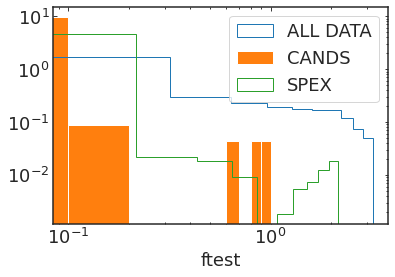

In [9]:
fig, ax=plt.subplots()
h2=plt.hist(alldata.f_test, density=True, histtype='step', label='ALL DATA')
h3=plt.hist(cands.f_test,  density=True,label='CANDS')
h=plt.hist(spex.f_test, density=True,  histtype='step', label='SPEX')
plt.legend()
plt.xlabel('ftest', fontsize=18)
ax.set(xscale='log', yscale='log')

In [10]:
#cands.f_test

#### 

(0.0, 5.0)

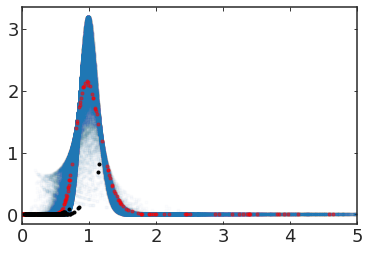

In [11]:
plt.plot(alldata.x, alldata.f_test, '.', alpha=0.01)
plt.plot(spex.x, spex.f_test, '.', c='r', alpha=0.5)
plt.plot(cands.x, cands.f_test, '.', c='k')

plt.xlim([0, 5])

(-0.1, 1.0)

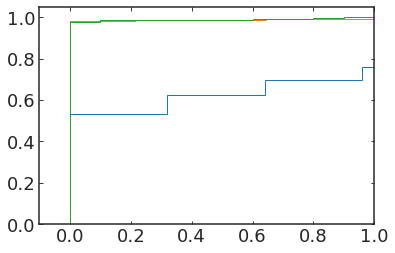

In [12]:
h=plt.hist(alldata.f_test, cumulative=True, density=True, histtype='step')
h=plt.hist(spex.f_test, cumulative=True, density=True, histtype='step')
h=plt.hist(cands.f_test, cumulative=True, density=True, histtype='step')
#plt.plot(cands.x, cands.f_test, '.', c='k')

plt.xlim([-0.1, 1])

In [13]:
len(spex[np.logical_and(spex.f_test.values > 0.9, np.vstack(spex.spt.values)[:,0] >=17.)])/len(spex)

0.004286827747466875

In [14]:
len(spex[np.logical_and(spex.f_test.values < 0.5, np.vstack(spex.spt.values)[:,0] >=17.)])/len(spex)

0.8117692907248636

In [15]:
len(cands[np.logical_and(cands.f_test.values > 0.9, np.vstack(cands.spt.values)[:,0] >=17.)])/len(cands)

0.004329004329004329

In [16]:
len(cands[np.logical_and(cands.f_test.values < 0.75, np.vstack(cands.spt.values)[:,0] >=17.)])/len(cands)

0.9913419913419913

In [17]:
#star_ids=alldata[alldata['class_star'] !=0]
#stars=wisps.Annotator.reformat_table(star_ids).reset_index(drop=True)
#cy=stars[stars.grism_id.isin(cx.grism_id)]

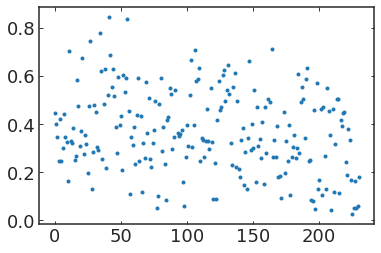

In [18]:
plt.plot(cands.x[cands.x<1.], '.')

In [19]:
dt=alldata[(alldata.f_test<0.02) &  (alldata.x<1.) & (alldata.snr1>=3.) &  (alldata.mstar_flag !=0)].reset_index(drop=True)
dt['spt']=(dt['spt']).apply(wisps.make_spt_number).apply(float)

In [20]:
dt=wisps.Annotator.reformat_table(dt).reset_index(drop=True)

In [21]:
#get criteria 
##only run this if new data
gbhio=sel_crt.save_criteria(conts=dt)
crts=sel_crt.crts_from_file()
contamns=pd.DataFrame([ x.contamination for x in crts.values()])
compls=pd.DataFrame([ x.completeness for x in crts.values()])

contamns.index=[x for x in crts.keys()]
compls.index=[x for x in crts.keys()]

  0%|          | 0/120 [00:00<?, ?it/s]

(2452, 34) (113, 34)


100%|██████████| 120/120 [00:55<00:00,  2.18it/s]


In [22]:
%%capture
'''
contamns.style.apply(lambda x: ["background-color: #7FDBFF" 
                          if (i >= 0 and (v < 0.1 
                                          and v > 0. )) 
                          else "" for i, v in enumerate(x)], axis = 1)
'''

In [23]:
def get_toplowest_contam(subtype, n):
    top=contamns.sort_values('L5-T0')[:n]
    return {subtype: [x  for x in top.index]}

In [24]:
ordered={}
for k in ['M7-L0', 'L0-L5', 'L5-T0', 'T0-T5', 'T5-T9', 'Y dwarfs', 'subdwarfs']:
    ordered.update(get_toplowest_contam(k, 6))

In [25]:
to_use= ordered


In [26]:
spex['spt']=np.vstack(spex.spt.values)[:,0]

In [27]:
from tqdm import tqdm

In [28]:
def multiplte_indices_selection(k):
    stat_dict={}
    indices= [crts[index_name] for index_name in to_use[k]]
    #make selections for each index separately
    cand_bools=[]
    spex_bools=[]
    trash_bools=[]
    for idx in indices:
        xkey=idx.xkey
        ykey=idx.ykey
        bx=[x for x in idx.shapes if x.shape_name==k][0]
        _, cbools=bx._select(np.array([cands[xkey].values,cands[ykey].values]))
        _, spbools=bx._select(np.array([spex[xkey].values,spex[ykey].values]))
        _, trbools=bx._select(np.array([dt[xkey].values, dt[ykey].values]))
        
        cand_bools.append(cbools)
        spex_bools.append(spbools)
        trash_bools.append(trbools)
        
    cands_in_that_class_bool=cands.spt.apply(lambda x: wisps.is_in_that_classification(x, k))
    spex_in_that_class_bool=spex.spt.apply(lambda x: wisps.is_in_that_classification(x, k))

    cand_bools.append(cands_in_that_class_bool)
    spex_bools.append(spex_in_that_class_bool)
    
    cands_selected=cands[np.logical_and.reduce(cand_bools, axis=0)]
    spexs_selected=spex[np.logical_and.reduce(spex_bools, axis=0)]
    
    print (' {} selected {} out of {} UCDS'.format(k, len( cands_selected), len(cands[cands_in_that_class_bool])))
    print ('overall completeness {}'.format( len(spexs_selected)/len(spex[spex_in_that_class_bool])))
    print ('total contaminants {}'.format(len(dt[np.logical_and.reduce(trash_bools)])))
    print ('-------------------------------------------')

In [29]:
for k in ['M7-L0', 'L0-L5', 'L5-T0', 'T0-T5', 'T5-T9', 'Y dwarfs']:
    multiplte_indices_selection(k)

 M7-L0 selected 128 out of 193 UCDS
overall completeness 0.9445073612684032
total contaminants 542
-------------------------------------------
 L0-L5 selected 17 out of 24 UCDS
overall completeness 0.9874213836477987
total contaminants 57
-------------------------------------------
 L5-T0 selected 4 out of 11 UCDS
overall completeness 0.9688249400479616
total contaminants 30
-------------------------------------------
 T0-T5 selected 7 out of 8 UCDS
overall completeness 0.9358974358974359
total contaminants 12
-------------------------------------------
 T5-T9 selected 2 out of 3 UCDS
overall completeness 0.8991596638655462
total contaminants 2
-------------------------------------------
 Y dwarfs selected 1 out of 1 UCDS
overall completeness 0.9047619047619048
total contaminants 0
-------------------------------------------


In [30]:
contamns.idxmin(axis=0)

L0-L5          CH_4/H-Cont H_2O-1+H_2O-2/H-Cont
L5-T0          CH_4/H-Cont H_2O-1+H_2O-2/H-Cont
M7-L0          CH_4/J-Cont H_2O-1+H_2O-2/J-Cont
T0-T5               H_2O-1/J-Cont H_2O-2/J-Cont
T5-T9        H_2O-2/H_2O-1 H_2O-1+H_2O-2/J-Cont
subdwarfs        CH_4/H-Cont H_2O-1+CH_4/J-Cont
trash                 H_2O-1/J-Cont CH_4/H-Cont
Y dwarfs            H_2O-1/J-Cont H_2O-2/H_2O-1
dtype: object

In [31]:
from collections import OrderedDict
ordered=[(k, contamns.idxmin(axis=0)[k]) for k in ['M7-L0', 'L0-L5', 'L5-T0', 'T0-T5', 'T5-T9', 'Y dwarfs', 'subdwarfs']]
to_use=  [ (y, x) for x, y in ordered]

In [32]:
to_use

[('CH_4/J-Cont H_2O-1+H_2O-2/J-Cont', 'M7-L0'),
 ('CH_4/H-Cont H_2O-1+H_2O-2/H-Cont', 'L0-L5'),
 ('CH_4/H-Cont H_2O-1+H_2O-2/H-Cont', 'L5-T0'),
 ('H_2O-1/J-Cont H_2O-2/J-Cont', 'T0-T5'),
 ('H_2O-2/H_2O-1 H_2O-1+H_2O-2/J-Cont', 'T5-T9'),
 ('H_2O-1/J-Cont H_2O-2/H_2O-1', 'Y dwarfs'),
 ('CH_4/H-Cont H_2O-1+CH_4/J-Cont', 'subdwarfs')]

In [33]:
import pickle
#save the random forest
output_file=wisps.OUTPUT_FILES+'/best_indices_to_use.pkl'
with open(output_file, 'wb') as file:
    pickle.dump(to_use,file)

In [34]:
fp={}

In [35]:
cands=cands[cands.grism_id.isin(dt.grism_id)]

In [46]:
def plot_index_box(index_name, box_name, ax):
    
    #get the index and the box
    idx=crts[index_name]
    bx=[x for x in idx.shapes if x.shape_name==box_name][0]
    
    xkey=idx.xkey
    ykey=idx.ykey

    to_use_df=spex_df
    if box_name.lower()=='y dwarfs':
        to_use_df=ydwarfs
    if box_name.lower()=='subdwarfs':
        to_use_df=wisps.Annotator.reformat_table(idx.subdwarfs)
        to_use_df['spt']=17
        
    xlim=[ bx.xrange[0]-.5*abs(np.ptp(bx.xrange)), bx.xrange[1]+.5*abs(np.ptp(bx.xrange))]
    ylim=[ bx.yrange[0]-.5*abs(np.ptp(bx.yrange)), bx.yrange[1]+.5*abs(np.ptp(bx.yrange))]
    
    if box_name.upper()=='T5-T9':
        print ('changin scale')
        print (bx.xrange[1])
        xlim=[ bx.xrange[0]-0.2*abs(np.ptp(bx.xrange)), np.round(bx.xrange[1]+0.2*abs(np.ptp(bx.xrange)))]

    
    #remove nans from background
    bckgrd= dt[[xkey, ykey]].replace(-np.inf, np.nan).replace(np.inf, np.nan).dropna()
    ax.scatter(bckgrd[xkey], bckgrd[ykey], s=1, c='#111111', label='Background')
    
    #bckgrd=bckgrd[(bckgrd[xkey].between(xlim[0], xlim[1])) & (bckgrd[ykey].between(ylim[0], ylim[1]))]

    #h=ax.hist2d(bckgrd[xkey].apply(float).values, bckgrd[ykey].apply(float).values, cmap='gist_yarg')
    
    cands_slctd, cands_bools=bx._select(np.array([cands[xkey].values,cands[ykey].values]))
   
    trash_slctd, trsh_bools=bx._select(np.array([dt[xkey].values, dt[ykey].values]))
    
    #simul_slctd, simul_bools=bx._select(np.array([simulated_data[xkey].values, simulated_data[ykey].values]))
    
    print (len(cands_slctd[0]), len((cands)))
    cands_in_that_class_bool=(cands).spt.apply(lambda x: wisps.is_in_that_classification(x, box_name))
    
    spexs_slctd_in_that_class_bool= (to_use_df).spt.apply(lambda x: wisps.is_in_that_classification(x, box_name))
    
    #simulated_in_that_class_bool=(simulated_data[simul_bools]).spt.apply(lambda x: wisps.is_in_that_classification(x, box_name))
    
    if box_name.lower()=='subdwarfs':
         spexs_slctd_in_that_class_bool=np.ones(len(to_use_df), dtype=bool)
    
    
   
    
    cands_in_that_class=np.array([cands_slctd[0], \
                                  cands_slctd[1]])
    
    #simulated_in_that_class= np.array([simul_slctd[0][simulated_in_that_class_bool], simul_slctd[1][simulated_in_that_class_bool]])
    
    spexs_slctd_in_that_class=np.array([to_use_df[xkey][spexs_slctd_in_that_class_bool], to_use_df[ykey][spexs_slctd_in_that_class_bool]])
    

    #ax.scatter( simulated_in_that_class[0],    simulated_in_that_class[1], facecolors='none', s=10, 
    #           edgecolors='#001f3f', label='simulated')
    
    ax.scatter(spexs_slctd_in_that_class[0], spexs_slctd_in_that_class[1],  facecolors='none',\
               edgecolors='#0074D9',  label='Templates {}'.format(box_name), s=50.)

    #ax.scatter(cands[xkey], cands[ykey], marker='x', facecolors='#FF851B', s=40., alpha=0.5)
    
    
    #ax.scatter( cands_in_that_class[0],    cands_in_that_class[1], marker='*', facecolors='#0074D9', edgecolors='#0074D9', 
    #       s=150., alpha=1., label='Discovered {}'.format(box_name))
    ax.scatter(cands[xkey].values, cands[ykey].values, marker='+',  s=150., facecolors='#FF851B')
    
    
    bx.color='None'
    bx.alpha=1.
    bx.linewidth=3
    bx.linestyle='-'
    bx.edgecolor='#0074D9'
    bx.plot(ax=ax, only_shape=True, highlight=False)
    
    #cb = plt.colorbar(h[3], ax=ax, orientation='horizontal')
    #cb.set_label('Counts in bin', fontsize=16)
    
    plt.tight_layout()
    
    ax.set_xlabel(r'$'+str(idx.name.split(' ')[0])+'$', fontsize=14)
    ax.set_ylabel(r'$'+str(idx.name.split(' ')[1])+'$', fontsize=14)
    
    ax.set_title(box_name, fontsize=18)
    
    xbuffer=np.nanstd(to_use_df[[xkey,ykey]])
    
   
    
    ax.minorticks_on()
    

    if (trash_slctd.shape[1])==0:
        fprate=0.0
    else:
        fprate=(trash_slctd.shape[1]- cands_slctd.shape[1])/trash_slctd.shape[1]
        if box_name.lower()=='subdwarfs':
                fprate=1.
    
    fp[box_name]=  fprate
    
        
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
    plt.tight_layout()
    print (' {} selected {}'.format(box_name, len(bx.select( bckgrd))))
    
    return {str(box_name): bx}
    
    

In [37]:
to_use

[('CH_4/J-Cont H_2O-1+H_2O-2/J-Cont', 'M7-L0'),
 ('CH_4/H-Cont H_2O-1+H_2O-2/H-Cont', 'L0-L5'),
 ('CH_4/H-Cont H_2O-1+H_2O-2/H-Cont', 'L5-T0'),
 ('H_2O-1/J-Cont H_2O-2/J-Cont', 'T0-T5'),
 ('H_2O-2/H_2O-1 H_2O-1+H_2O-2/J-Cont', 'T5-T9'),
 ('H_2O-1/J-Cont H_2O-2/H_2O-1', 'Y dwarfs'),
 ('CH_4/H-Cont H_2O-1+CH_4/J-Cont', 'subdwarfs')]

In [38]:
idx=crts[to_use[1][0]]

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


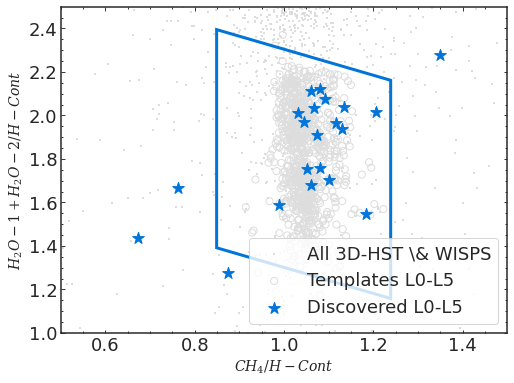

In [39]:
#plt.style.use('dark_background')

fig, ax=plt.subplots(figsize=(8, 6))

xkey=idx.xkey
ykey=idx.ykey

to_use_df=spex_df
box_name='L0-L5'
bx=[x for x in idx.shapes if x.shape_name=='L0-L5'][0]

bckgrd= dt[[xkey, ykey]].replace(-np.inf, np.nan).replace(np.inf, np.nan).dropna()
cands_slctd, cands_bools=bx._select(np.array([cands[xkey].values,cands[ykey].values]))

plt.scatter(bckgrd[xkey], bckgrd[ykey], s=2, marker='+', c='#DDDDDD', label='All 3D-HST \& WISPS')
  
spexs_slctd_in_that_class_bool= (to_use_df).spt.apply(lambda x: wisps.is_in_that_classification(x, box_name))
spexs_slctd_in_that_class=np.array([to_use_df[xkey][spexs_slctd_in_that_class_bool], to_use_df[ykey][spexs_slctd_in_that_class_bool]])

ax.scatter(spexs_slctd_in_that_class[0], spexs_slctd_in_that_class[1],  facecolors='none', edgecolors='#DDDDDD',  
           label='Templates L0-L5', s=50.)


ldfs =cands[cands.spt.between(20, 25)]
odfs =cands[~cands.spt.between(20, 25)]
#ax.scatter(odfs[xkey], odfs[ykey], marker='x', facecolors='#FF851B', s=150., alpha=0.5, label='Candidates')
ax.scatter(ldfs[xkey], ldfs[ykey], marker='*', facecolors='#0074D9', edgecolors='#0074D9', 
           s=150., alpha=1., label='Discovered L0-L5')

bx.color='None'
bx.alpha=1.
bx.linewidth=3
bx.linestyle='-'
bx.edgecolor='#0074D9'
bx.plot(ax=ax, only_shape=True, highlight=False)

plt.xlim([0.5, 1.5])
plt.ylim([1., 2.5])
plt.minorticks_on()

ax.set_xlabel(r'$'+str(idx.name.split(' ')[0])+'$', fontsize=14)
ax.set_ylabel(r'$'+str(idx.name.split(' ')[1])+'$', fontsize=14)

plt.legend(loc='lower right')
#ax.scatter( cands_in_that_class[0],    cands_in_that_class[1], marker='x', facecolors='#FF851B', s=40, 
#           edgecolors='#FF4136', label='candidates')
#plt.tight_layout()
plt.savefig(wisps.OUTPUT_FIGURES+ '/example_index_plot_stars.pdf', \
            bbox_inches='tight')

In [40]:
#hjk

0 ('CH_4/J-Cont H_2O-1+H_2O-2/J-Cont', 'M7-L0')
167 217
 M7-L0 selected 594
1 ('CH_4/H-Cont H_2O-1+H_2O-2/H-Cont', 'L0-L5')
25 217
 L0-L5 selected 295
2 ('CH_4/H-Cont H_2O-1+H_2O-2/H-Cont', 'L5-T0')
10 217
 L5-T0 selected 150
3 ('H_2O-1/J-Cont H_2O-2/J-Cont', 'T0-T5')
21 217
 T0-T5 selected 51
4 ('H_2O-2/H_2O-1 H_2O-1+H_2O-2/J-Cont', 'T5-T9')
changin scale
0.9541718400851781
4 217
 T5-T9 selected 2
5 ('H_2O-1/J-Cont H_2O-2/H_2O-1', 'Y dwarfs')
2 217
 Y dwarfs selected 0
6 ('CH_4/H-Cont H_2O-1+CH_4/J-Cont', 'subdwarfs')
173 217
 subdwarfs selected 1866


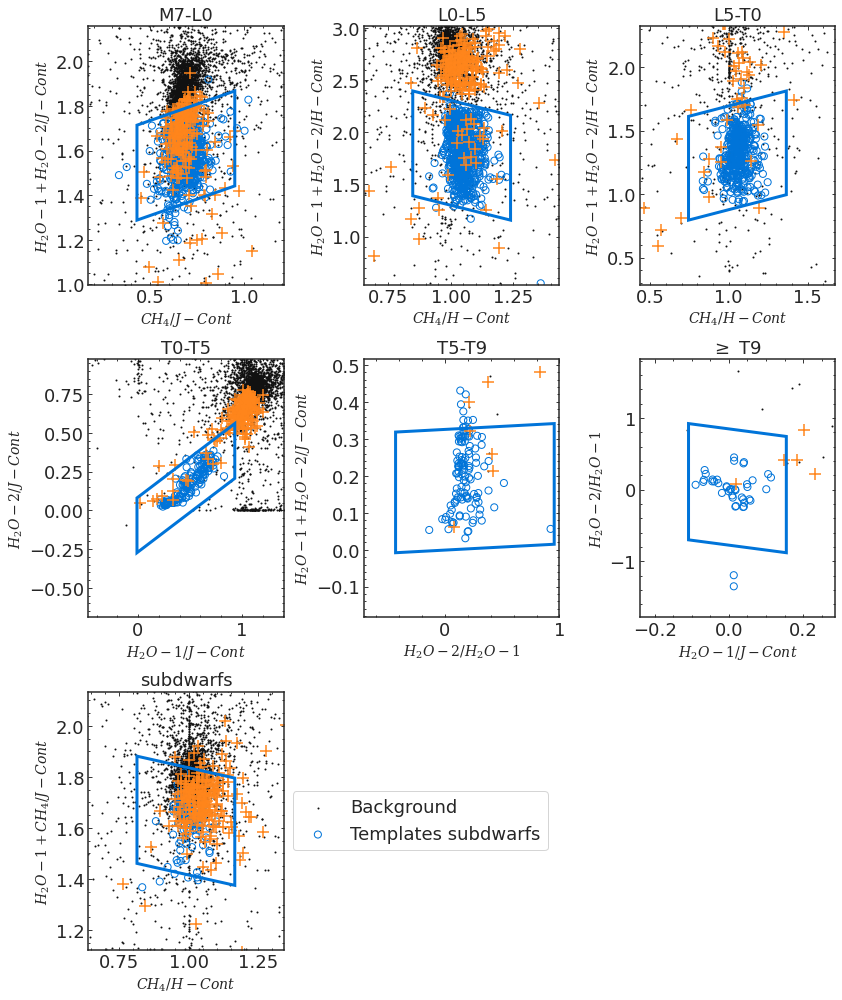

In [47]:
fig, ax=plt.subplots(nrows=3, ncols=3, figsize=(12, 14))

bxs=[]
for idx, k in enumerate(to_use):
    print (idx, k)
    b=plot_index_box( k[0], k[1], np.concatenate(ax)[idx])
    bxs.append(b)



plt.tight_layout()


fig.delaxes(np.concatenate(ax)[-1])
fig.delaxes(np.concatenate(ax)[-2])



np.concatenate(ax)[-4].set_title(r'$\geq$ T9 ', fontsize=18)
#subdindx_index_crt=crts['H_2O-1/J-Cont H_2O-2/H_2O-1']
#subdrfs=wisps.Annotator.reformat_table(dummy_index_crt.subdwarfs)
#tpls=wisps.Annotator.reformat_table(spex_df[spex_df.metallicity_class.isna()])
#a=np.concatenate(ax)[-1]
#tpls=tpls[tpls.spt>16]

#a.scatter(dt[subdindx_index_crt.xkey], dt[subdindx_index_crt.ykey], s=1., c='#111111', alpha=0.1)
#a.scatter(tpls[subdindx_index_crt.xkey], tpls[subdindx_index_crt.ykey], marker='+', facecolors='#0074D9',  label='SpeX', s=5.)
#a.scatter(subdrfs[subdindx_index_crt.xkey], subdrfs[subdindx_index_crt.ykey], marker='+', facecolors='#2ECC40',  label='SpeX', s=30.)


#a.set_xlim([0., 1.35])
#a.set_ylim([0., 1.25])
#a.set_title('subdwarfs', fontsize=18)
#a.set_xlabel(r'$'+str(subdindx_index_crt.name.split(' ')[0])+'$', fontsize=15)
#a.set_ylabel(r'$'+str(subdindx_index_crt.name.split(' ')[1])+'$', fontsize=15)

np.concatenate(ax)[-3].legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig(wisps.OUTPUT_FIGURES+'/index_index_plots.pdf', bbox_inches='tight', rasterized=True,  dpi=50000)

In [48]:
#dghj

In [49]:
from tensorflow import keras

rfdict=pd.read_pickle(wisps.OUTPUT_FILES+'/random_forest_classifier.pkl') #the classifier 
neural_network= keras.models.load_model(wisps.OUTPUT_FILES+'/deep_model_september23.h5')
features=rfdict['feats']

probs= neural_network.predict(alldata[features])
labels=np.logical_or.reduce((probs[:, 2] >.95, probs[:,3] >.95 , probs[:,4] >0.8))
sltc=cands[cands.grism_id.str.lower().isin((alldata[labels]).reset_index(drop=True).grism_id.values)]

In [50]:
common=dt[dt.grism_id.isin(cands.grism_id)]

In [51]:
len(sltc)

138

In [52]:
#.grism_id.to_csv('/users/caganze/desktop/true_brown_dwarfs.csv')

In [53]:
bx_dict={}
for b in bxs:
    bx_dict.update(b)

In [54]:
#invert to use
inv_to_use = {v: k for k, v in to_use}

In [55]:
ncandidates=[]
for spt_range in bx_dict.keys():
    idx_name=inv_to_use[spt_range]
    idx=crts[idx_name]
    s, bools=(bx_dict[spt_range])._select(np.array([dt[idx.xkey].values, dt[idx.ykey].values]))
    ncandidates.append(dt[bools])

In [56]:
candsss=(pd.concat(ncandidates).drop_duplicates(subset='grism_id'))
cands.grism_id=cands.grism_id.apply(lambda x: x.lower().strip())
good_indices=[crts[x] for x in inv_to_use.values()]

In [57]:
len(candsss), len(candsss[candsss.grism_id.isin(cands.grism_id.apply(lambda x: x.lower().strip())) & (candsss.spt.apply(wisps.make_spt_number)>16)])

(2304, 145)

In [58]:
len(candsss.drop_duplicates('grism_id'))/len(alldata)

0.009061447943869365

In [59]:
len(candsss[candsss.grism_id.isin(cands.grism_id) & (candsss.spt.apply(wisps.make_spt_number).between(35, 40))])

4

In [60]:
#leb()

In [61]:
candsss.to_pickle(wisps.OUTPUT_FILES+'/selected_by_indices.pkl')

In [62]:
#print out table
def round_tuple(tpl, n=2):
    return round(tpl[0], n), round(tpl[1],n)

for index, k in to_use:
    spt_range=k
    sindex=crts[index]
    bs=sindex.shapes
    bs=[x for x in bs if x.shape_name==spt_range]

    bx=bs[0]
    
    print (" {} & {} &  {} & {} & {} & {} & {} & {} & {}  & {} \\\ ".format(spt_range,sindex.xkey, sindex.ykey, 
                                                                           round_tuple(bx.vertices[0]), round_tuple(bx.vertices[1])
                                                                          , round_tuple(bx.vertices[2]), round_tuple(bx.vertices[3]),
                                                                          round(sindex.completeness[spt_range], 2), 
                                                                            round(sindex.contamination[spt_range], 6), 
                                                                           round(fp[spt_range],6)))
    

 M7-L0 & CH_4/J-Cont &  H_2O-1+H_2O-2/J-Cont & (0.43, 1.71) & (0.95, 1.87) & (0.95, 1.44) & (0.43, 1.29) & 0.97 & 0.130664  & 0.718855 \\ 
 L0-L5 & CH_4/H-Cont &  H_2O-1+H_2O-2/H-Cont & (0.85, 2.39) & (1.24, 2.16) & (1.24, 1.16) & (0.85, 1.39) & 0.99 & 0.064992  & 0.915254 \\ 
 L5-T0 & CH_4/H-Cont &  H_2O-1+H_2O-2/H-Cont & (0.74, 1.61) & (1.37, 1.81) & (1.37, 1.0) & (0.74, 0.8) & 0.99 & 0.033047  & 0.933333 \\ 
 T0-T5 & H_2O-1/J-Cont &  H_2O-2/J-Cont & (-0.01, 0.08) & (0.93, 0.56) & (0.93, 0.21) & (-0.01, -0.27) & 1.0 & 0.011221  & 0.588235 \\ 
 T5-T9 & H_2O-2/H_2O-1 &  H_2O-1+H_2O-2/J-Cont & (-0.43, 0.32) & (0.95, 0.34) & (0.95, 0.01) & (-0.43, -0.01) & 0.99 & 0.000437  & -1.0 \\ 
 Y dwarfs & H_2O-1/J-Cont &  H_2O-2/H_2O-1 & (-0.11, 0.92) & (0.15, 0.74) & (0.15, -0.88) & (-0.11, -0.7) & 0.95 & 0.0  & 0.0 \\ 
 subdwarfs & CH_4/H-Cont &  H_2O-1+CH_4/J-Cont & (0.81, 1.88) & (1.17, 1.8) & (1.17, 1.38) & (0.81, 1.46) & 0.95 & 0.411104  & 1.0 \\ 


In [63]:
#ghjk

In [64]:
stars= alldata[alldata.mstar_flag !=0]

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


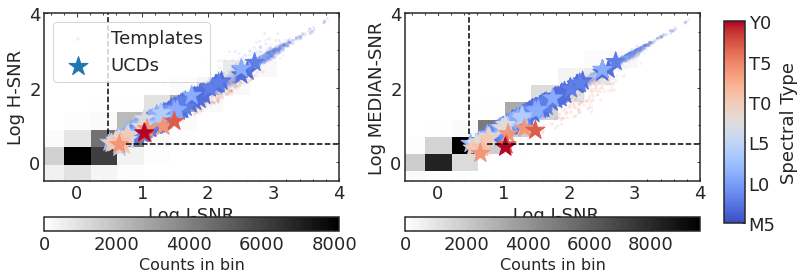

In [65]:
cands_dff=(cands[np.logical_and(cands['snr1'] >=3., cands['spt'] >=17)]).sort_values('spt')
spex_df=spex_df.sort_values('spt')

star_snr=stars[['snr1', 'snr2', 'snr3', 'snr4']].apply(np.log10).dropna()
star_snr=(star_snr[star_snr.snr1.between(-1, 4) & star_snr.snr3.between(-1, 4) & star_snr.snr4.between(-1, 4)]).reset_index(drop=True)


fig, (ax, ax1)=plt.subplots(ncols=2, figsize=(10, 4))

h=ax.hist2d(star_snr['snr1'], star_snr['snr3'], cmap='gist_yarg', bins=10, label='Point Sources')
#ax.scatter(star_snr['snr1'], star_snr['snr3'], c='#111111', s=1, alpha=0.1)
cb = plt.colorbar(h[3], ax=ax, orientation='horizontal')
cb.set_label('Counts in bin', fontsize=16)
plt.tight_layout()

#ax.scatter(star_snr['snr1'],  star_snr['snr4'], s=1., c='k', alpha=0.1, 
#            label='3D-HST or WISP')


ax.scatter(spex_df['snr1'].apply(np.log10), spex_df['snr3'].apply(np.log10),
           marker='+', s=10, c=spex_df.spt, 
            cmap='coolwarm', label='Templates', alpha=0.1, vmin=15, vmax=40) 

ax.scatter(cands_dff['snr1'].apply(np.log10), cands_dff['snr3'].apply(np.log10), 
           c=cands_dff['spt'], s=400,  marker='*', cmap='coolwarm', label='UCDs'
           , vmin=15, vmax=40) 
ax.set_xlim([-0.5, 4])
ax.set_ylim([-0.5, 4])
ax.set_xlabel('Log J-SNR', fontsize=18)
ax.set_ylabel('Log H-SNR', fontsize=18)
ax.legend(fontsize=18, loc='upper left')

ax.axhline(np.log10(3), c='k', xmin=np.log10(3)-0.2, linestyle='--')
ax.axvline(np.log10(3), c='k', ymin=np.log10(3)-0.2, linestyle='--')



#ax1.scatter(stars['snr1'].apply(np.log10), stars['snr4'].apply(np.log10), s=1., c='k', alpha=0.1, 
#            label='3D-HST or WISP')
#ax1.scatter(star_snr['snr1'], star_snr['snr4'], c='#111111', s=1, alpha=0.1)
h1=ax1.hist2d(star_snr['snr1'], star_snr['snr4'], cmap='gist_yarg', bins=10, label='Point Sources')

mp=ax1.scatter(spex_df['snr1'].apply(np.log10), spex_df['snr4'].apply(np.log10), marker='+', s=10, c=spex_df.spt, 
            cmap='coolwarm', label='Templates', alpha=0.1, vmin=15, vmax=40) 

ax1.scatter(cands_dff['snr1'].apply(np.log10), cands_dff['snr4'].apply(np.log10), 
                       c=cands_dff['spt'], s=400, marker='*', cmap='coolwarm', label='UCDs',  vmin=15, vmax=40) 
ax1.set_xlim([-0.5, 4])
ax1.set_ylim([-0.5, 4])
ax1.set_xlabel(' Log J-SNR', fontsize=18)
ax1.set_ylabel('Log MEDIAN-SNR', fontsize=18)
#ax.legend(fontsize=18)

ax1.axhline(np.log10(3), c='k', xmin=np.log10(3)-0.2, linestyle='--')
ax1.axvline(np.log10(3), c='k', ymin=np.log10(3)-0.2, linestyle='--')

cb1 = plt.colorbar(h1[3], ax=ax1, orientation='horizontal')
cb1.set_label('Counts in bin', fontsize=16)
#plt.tight_layout()
import matplotlib
cax = fig.add_axes([1.01, 0.21, .03, 0.7])
norm= matplotlib.colors.Normalize(vmin=15,vmax=40)
mp=matplotlib.cm.ScalarMappable(norm=norm, cmap='coolwarm')
cbar=plt.colorbar(mp, cax=cax, orientation='vertical')
cbar.ax.set_ylabel(r'Spectral Type', fontsize=18)

ax.minorticks_on()
ax1.minorticks_on()

cbar.ax.set_yticks([ 17, 20, 25, 30, 35, 40])
cbar.ax.set_yticklabels(['M5', 'L0', 'L5', 'T0', 'T5', 'Y0'])
plt.tight_layout()

plt.savefig(wisps.OUTPUT_FIGURES+'/snr_cutplots.pdf', bbox_inches='tight', dpi=4000)

In [66]:
#import wisps

In [67]:
big=wisps.get_big_file()
bigsnr=big[big.snr1>=3.]

In [68]:
#

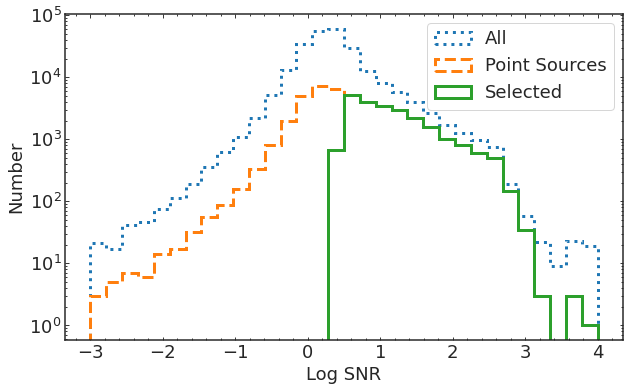

In [69]:
fig, ax=plt.subplots(figsize=(10, 6))
h=ax.hist(big.snr1.apply(np.log10).values, range=[-3, 4], bins=32, histtype='step',  linestyle=':', 
          label='All', log=True, linewidth=3)
h=ax.hist(stars.snr1.apply(np.log10).values, range=[-3, 4], bins=32, histtype='step', linewidth=3, label='Point Sources',
          linestyle='--', log=True)
h=ax.hist(stars[stars.snr1>3].snr1.apply(np.log10).values, range=[-3, 4], bins=32, histtype='step', linewidth=3,
          label='Selected',
          log=True)
#h=ax.hist(bigsnr.snr1.apply(np.log10).values, range=[-3, 4], bins=32, histtype='step', linewidth=3, log=True)
ax.minorticks_on()
plt.xlabel('Log SNR')
plt.ylabel('Number')
plt.legend()
plt.savefig(wisps.OUTPUT_FIGURES+'/snr_distribution.pdf', bbox_inches='tight',  facecolor='white', transparent=False)

In [70]:
#s3=wisps.Source(filename='goodss-01-G141_47749')
#s4=wisps.Source(filename='goodss-01-G141_45524')

In [71]:
bools=np.logical_and(stars.snr1.between(3, 1000), stars.f_test.between(1e-3, 1))

In [72]:
#s4._best_fit_line

fig, ax=plt.subplots(figsize=(8, 8))
plt.plot(s4.wave, s4.flux, color='#111111', label='Flux')
plt.plot(s4.wave, s4.noise,  '#39CCCC', label='Noise')
std=splat.getStandard(s4.spectral_type[0])
std.normalize(range=[1.2, 1.5])
chi, scale=splat.compareSpectra(s4.splat_spectrum, std,  comprange=[[1.2, 1.5]], statistic='chisqr', scale=True) 
std.scale(scale)
plt.plot(std.wave, std.flux, color='y', label='Best fit template')
plt.plot( s4._best_fit_line[0], color='#FF4136', label='Best fit line')
plt.xlim([1.1, 1.7])
plt.ylim([0, 0.1])
plt.xlabel('Wavelength (micron)')
plt.ylabel('Normalized Flux')
plt.legend()
plt.savefig(wisps.OUTPUT_FIGURES+'/example_line_fit.pdf', bbox_inches='tight',  facecolor='white', transparent=False)

In [73]:
compls.keys()

Index(['L0-L5', 'L5-T0', 'M7-L0', 'T0-T5', 'T5-T9', 'subdwarfs', 'trash',
       'Y dwarfs'],
      dtype='object')

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


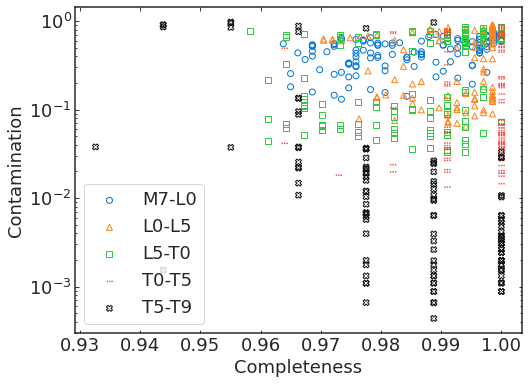

In [74]:
fig, ax=plt.subplots(figsize=(8,6))

#for k in  ['L0-L5', 'L5-T0', 'M7-L0', 'T0-T5', 'T5-T9','subdwarfs']:
ax.scatter(compls['M7-L0'].values, contamns['M7-L0'].values,  facecolors='none', edgecolors='#0074D9', 
           label='M7-L0')
ax.scatter(compls['L0-L5'].values, contamns['L0-L5'].values, marker='^',  facecolors='none',\
           edgecolors='#FF851B', label='L0-L5')

ax.scatter(compls['L5-T0'].values, contamns['L5-T0'].values, marker='s',  facecolors='none',
           edgecolors='#2ECC40', label='L5-T0')

ax.scatter(compls['T0-T5'].values, contamns['T0-T5'].values, marker='$...$',  facecolors='none', 
           edgecolors='#FF4136',
           label='T0-T5')
ax.scatter(compls['T5-T9'].values, contamns['T5-T9'].values, marker='X',  facecolors='none',
           edgecolors='#111111',
           label='T5-T9')
    #h=plt.hist(contams[k].values,  bins='auto', histtype='step',
    #      label='All', log=True, linewidth=3)
ax.set_xlabel('Completeness')
ax.set_ylabel('Contamination')
plt.legend()
ax.set_yscale('log')
plt.savefig(wisps.OUTPUT_FIGURES+'/completeness_contam.pdf', bbox_inches='tight',  facecolor='white', transparent=False)

In [ ]:
splat.empirical.typeToTeff('L0.0')

(<Quantity 2233.48 K>, <Quantity 100. K>)